In [3]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def plot_images(img1,img2,title1="",title2=""):
    fig=plt.figure(figsize=[15,15])
    ax1=fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[],yticks=[],title=title1)
    
    ax2=fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[],yticks=[],title=title2)
    

In [5]:
path = "./images/car1.jpg"

In [6]:
image = cv2.imread(path)

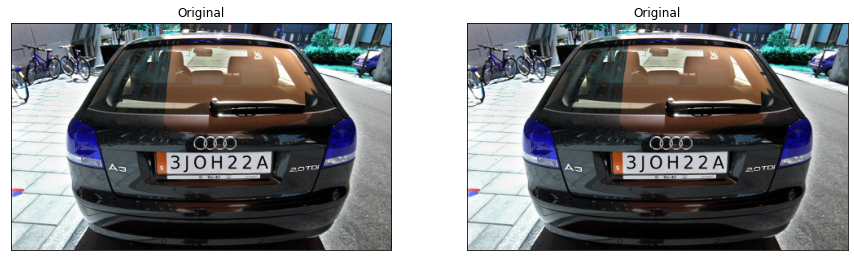

In [7]:
plot_images(image,image,title1="Original",title2="Original")

In [8]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

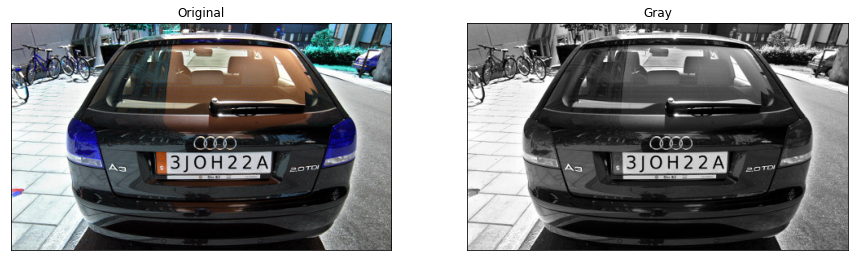

In [9]:
plot_images(image,gray,title1="Original",title2="Gray")

In [10]:
blur= cv2.bilateralFilter(gray, 11, 90,90)

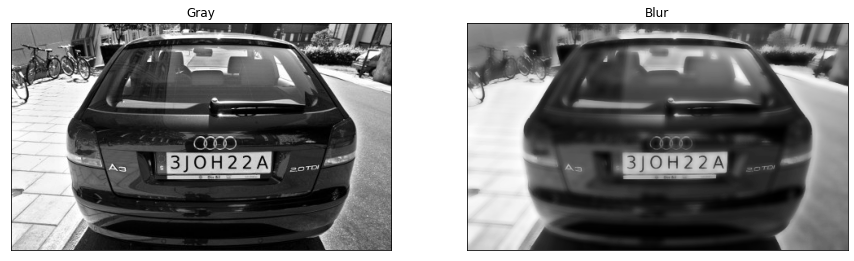

In [11]:
plot_images(gray,blur,title1="Gray",title2="Blur")

In [12]:
edges=cv2.Canny(blur,30,200)

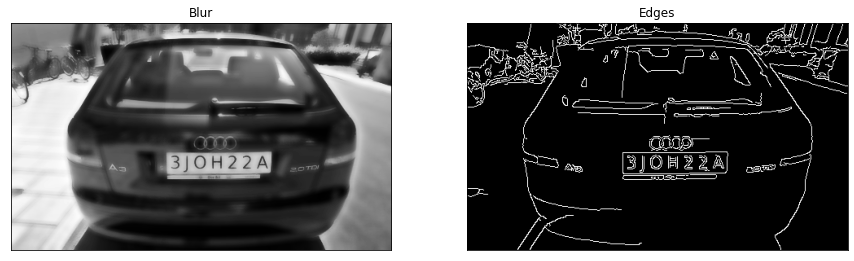

In [13]:
plot_images(blur,edges,title1="Blur",title2="Edges")

In [14]:
cnts, new=cv2.findContours(edges.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
image_copy=image.copy()

In [16]:
_=cv2.drawContours(image_copy,cnts,-1,(255,0,255),2)

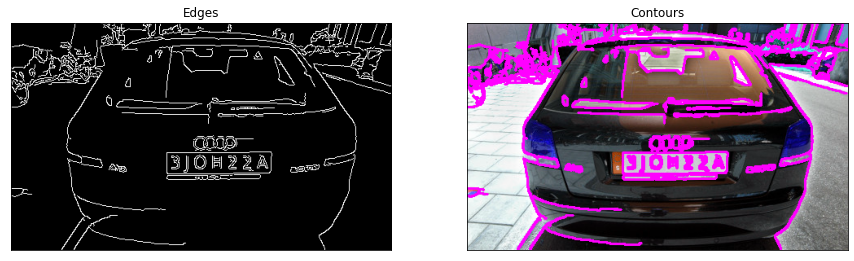

In [17]:
plot_images(edges,image_copy,title1="Edges",title2="Contours")

In [18]:
print(len(cnts))

194


In [19]:
cnts=sorted(cnts,key=cv2.contourArea,reverse=True)[:10]

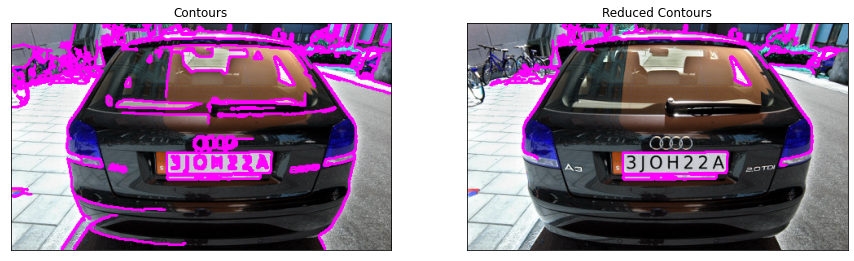

In [20]:
image_reduced_cnts=image.copy()
_=cv2.drawContours(image_reduced_cnts,cnts,-1,(255,0,255),2)
plot_images(image_copy,image_reduced_cnts,title1="Contours",title2="Reduced Contours")

In [21]:
print(len(cnts))

10


In [22]:
plate = None
for c in cnts:
    perimeter=cv2.arcLength(c,True)
    edges_count=cv2.approxPolyDP(c,0.02 * perimeter, True)
    if len(edges_count)==4:
        x,y,w,h=cv2.boundingRect(c)
        plate=image[y:y+h,x:x+w]
        break

cv2.imwrite("plate.png",plate)

True

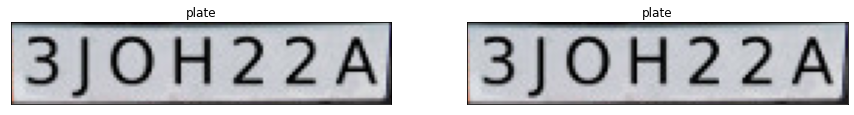

In [23]:
 plot_images(plate,plate,title1="plate",title2="plate")

In [29]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'D:\SEM 5\ML\ANPD\env\Scripts\tesseract.exe'
text = pytesseract.image_to_string(plate, lang='eng')
print(text)


TesseractNotFoundError: D:\SEM 5\ML\ANPD\env\Scripts	esseract.exe is not installed or it's not in your PATH. See README file for more information.